In [1]:
import joblib
import pandas as pd
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt
import hist
from hist import Hist

In [3]:
pred_pkls_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_new/nominal'
pred_pkls_path = Path(pred_pkls_path)

In [4]:
pred_pkls_files = sorted(pred_pkls_path.rglob('pythia*_pred.pkl'))

In [5]:
sample = []
for pred_pkls_file in pred_pkls_files:
    sample_pd = joblib.load(pred_pkls_file)
    sample_pd = sample_pd[(sample_pd["jet_nTracks"] > 1) & (sample_pd["target"] != '-') & (sample_pd['event_weight'] < 50)] 

    sample.append(sample_pd.sample(frac = 0.3))

In [6]:
sample = pd.concat(sample)

In [7]:
#sample.shape
sample.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target,GBDT_newScore,jet_nTracks_quark_reweighting_weights,jet_nTracks_gluon_reweighting_weights,GBDT_newScore_quark_reweighting_weights,GBDT_newScore_gluon_reweighting_weights
2543068,364704.0,326732788.0,615.709106,1.506068,11.0,0.014920,0.157857,-0.318728,2.0,2.0,0.270071,1.0,1.0,1,0,-2.361870,0.270071,0.270071,0.270071,0.270071
5919376,364705.0,80320883.0,1000.442627,1.321681,42.0,0.061306,0.267228,0.375218,21.0,2.0,0.029185,1.0,1.0,3,1,2.000355,0.029185,0.029185,0.029185,0.029185
502507,364704.0,112698400.0,534.291199,0.463939,14.0,0.030722,0.211403,-0.050403,2.0,2.0,0.339646,0.0,0.0,0,0,-0.341403,0.343751,0.303615,0.341152,0.314389
561272,364705.0,56104703.0,980.530273,0.297703,44.0,0.068126,0.288530,0.416542,21.0,2.0,0.021346,0.0,1.0,2,1,2.132035,0.026068,0.023455,0.027974,0.024120
3677815,364704.0,318173224.0,508.494324,-1.538007,17.0,0.064199,0.259435,0.024359,5.0,2.0,0.466506,1.0,0.0,0,0,0.219316,0.466506,0.466506,0.466506,0.466506


In [7]:
sample_1 = sample[sample.columns[:15]]

In [9]:
sample_1.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target
2543068,364704.0,326732788.0,615.709106,1.506068,11.0,0.014920,0.157857,-0.318728,2.0,2.0,0.270071,1.0,1.0,1,0
5919376,364705.0,80320883.0,1000.442627,1.321681,42.0,0.061306,0.267228,0.375218,21.0,2.0,0.029185,1.0,1.0,3,1
502507,364704.0,112698400.0,534.291199,0.463939,14.0,0.030722,0.211403,-0.050403,2.0,2.0,0.339646,0.0,0.0,0,0
561272,364705.0,56104703.0,980.530273,0.297703,44.0,0.068126,0.288530,0.416542,21.0,2.0,0.021346,0.0,1.0,2,1
3677815,364704.0,318173224.0,508.494324,-1.538007,17.0,0.064199,0.259435,0.024359,5.0,2.0,0.466506,1.0,0.0,0,0


In [8]:
sample_g = sample_1[sample_1["target"] == 1]
sample_q = sample_1[sample_1["target"] == 0]

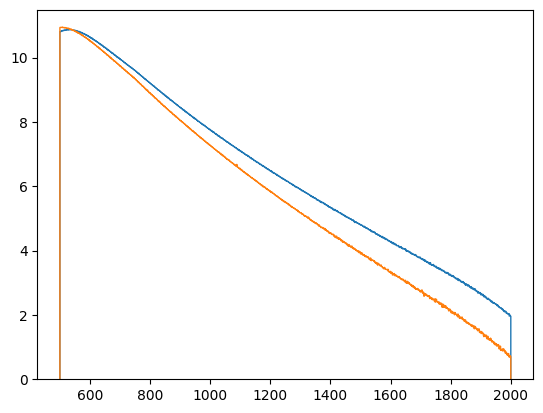

In [9]:
pt_hist =Hist(hist.axis.Regular(bins=1500, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist.fill(sample_q['jet_pt'], weight=sample_q['event_weight'])
plt.stairs(np.log(pt_hist.values()), np.linspace(500,2000,1501))
#pt_hist.plot()
pt_hist_g =Hist(hist.axis.Regular(bins=1500, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_g.fill(sample_g['jet_pt'], weight=sample_g['event_weight'])
plt.stairs(np.log(pt_hist_g.values()), np.linspace(500,2000,1501))

In [10]:
flatpt_factor = 1.0 / pt_hist.values()
flatpt_factor_g = 1.0 / pt_hist_g.values()

In [11]:
pt_idx = np.digitize(sample_q['jet_pt'], bins=np.linspace(500,2000,1501)) - 1
pt_idx_g = np.digitize(sample_g['jet_pt'], bins=np.linspace(500,2000,1501)) - 1

In [12]:
sample_q['flatpt_weight'] = sample_q['event_weight'] * flatpt_factor[pt_idx]
sample_g['flatpt_weight'] = sample_g['event_weight'] * flatpt_factor_g[pt_idx_g]

/tmp/ipykernel_168422/2679538622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_q['flatpt_weight'] = sample_q['event_weight'] * flatpt_factor[pt_idx]
/tmp/ipykernel_168422/2679538622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_g['flatpt_weight'] = sample_g['event_weight'] * flatpt_factor_g[pt_idx_g]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0d85b346a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

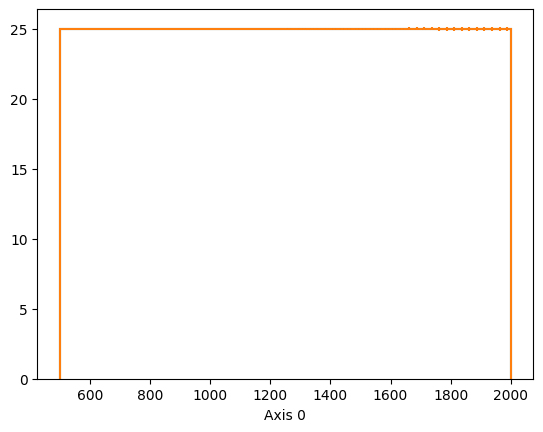

In [13]:
pt_hist_flat_pt =Hist(hist.axis.Regular(bins=60, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_flat_pt.fill(sample_q['jet_pt'], weight=sample_q['flatpt_weight'])
pt_hist_flat_pt.plot()

pt_hist_flat_pt_g =Hist(hist.axis.Regular(bins=60, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_flat_pt_g.fill(sample_g['jet_pt'], weight=sample_g['flatpt_weight'])
pt_hist_flat_pt_g.plot()

In [14]:
sample_qg=[sample_q,sample_g]
sample_all = pd.concat(sample_qg)

In [16]:
sample_q.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target,flatpt_weight
510960,364704.0,102278488.0,716.791199,-0.708201,13.0,0.022982,0.153878,-0.220453,2.0,2.0,0.109523,1.0,1.0,1,0,0.000006
1122076,364705.0,82062687.0,982.900574,-0.161075,14.0,0.018117,0.133198,-0.233522,2.0,2.0,0.023576,0.0,1.0,2,0,0.000009
151197,364704.0,48545143.0,570.160767,-1.347059,10.0,0.025136,0.096162,-0.326035,2.0,2.0,0.251789,1.0,0.0,0,0,0.000005
2173207,364704.0,93579906.0,576.570984,0.995219,22.0,0.040128,0.215813,0.132898,2.0,2.0,0.338753,1.0,0.0,0,0,0.000007
3297986,364705.0,82364127.0,1161.346191,-0.886354,17.0,0.044928,0.099301,-0.145626,2.0,2.0,0.012738,1.0,1.0,3,0,0.000015


In [17]:
sample_all_q = sample_all[sample_all['target']==0]

: 

: 

In [15]:
sample_all.to_pickle("training_sample_qg.pkl")

In [2]:
sample = pd.read_pickle('training_sample_qg.pkl')

In [12]:
sample.isnull().any(axis=0)

run                       False
event                     False
jet_pt                    False
jet_eta                   False
jet_nTracks               False
jet_trackWidth            False
jet_trackC1               False
jet_trackBDT              False
jet_PartonTruthLabelID    False
jet_cleaning              False
event_weight              False
is_forward                False
is_leading                False
pt_idx                    False
target                    False
flatpt_weight             False
dtype: bool

In [4]:
sample['target'] = sample['target'].astype(float)

In [6]:
sample_hr=pd.read_pickle("/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/LightGBM/training_sample.pkl")

In [7]:
sample_hr.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,event_weight,is_forward,is_leading,pt_idx,target,flatpt_weight
38784,364704.0,128244426.0,756.918274,-0.267729,13.0,0.016890,0.158292,-0.212644,2.0,0.400877,1.0,1.0,1,0.0,0.000016
76944,364705.0,33428078.0,979.209412,-0.177722,29.0,0.035617,0.227922,0.263193,21.0,0.420153,0.0,1.0,2,1.0,0.000097
184802,364704.0,134794190.0,521.805176,0.770232,15.0,0.025237,0.203193,-0.059303,4.0,1.047949,1.0,1.0,0,0.0,0.000010
286675,364704.0,138678461.0,512.864563,-1.864337,14.0,0.035285,0.196587,-0.053137,21.0,0.459634,1.0,0.0,0,1.0,0.000004
99196,364704.0,123346880.0,701.029419,-0.035616,12.0,0.012978,0.156514,-0.290759,2.0,0.411335,0.0,1.0,1,0.0,0.000011


In [13]:
sample_hr.isnull().any(axis=0)

run                       False
event                     False
jet_pt                    False
jet_eta                   False
jet_nTracks               False
jet_trackWidth            False
jet_trackC1               False
jet_trackBDT              False
jet_PartonTruthLabelID    False
event_weight              False
is_forward                False
is_leading                False
pt_idx                    False
target                    False
flatpt_weight             False
dtype: bool